In [ ]:
!pip install aggdraw

from PIL import Image, ImageDraw
import aggdraw
import matplotlib.pyplot as plt
import numpy as np
from math import cos, sin, sqrt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class Drawing:
  def __init__(self, image):
    self.d = aggdraw.Draw(image)
    self.img_height = image.height
    self.img_width = image.width

  def transform(self, arr):
    return [j[i]*self.img_width if i%2==0 else j[i]*self.img_height for j in arr for i in range(len(j))]

  def __enter__(self):
    return self

  def __exit__(self, exc_type, exc_value, traceback):
    self.d.flush()

  def rectangle(self, points, pen=None, brush=None):
    self.d.rectangle(self.transform(points), pen, brush)

  def line(self, *points, pen=None):
    self.d.line(self.transform(points), pen)

  def arc(self, points, start, end, pen=None):
    self.d.arc(self.transform(points), start, end, pen)

  def chord(self, points, start, end, pen=None, brush=None):
    self.d.chord(self.transform(points), start, end, pen, brush)
    
  def pieslice(self, points, start, end, pen=None, brush=None):
    self.d.pieslice(self.transform(points), start, end, pen, brush)

  def ellipse(self, points, pen=None, brush=None):
    self.d.ellipse(self.transform(points), pen, brush)
    
  def path(self, path, pen=None, brush=None):
      self.d.path(path.p, pen, brush)

class Path:
  def __init__(self, drawing, x, y):
    self.p = aggdraw.Path()
    self.img_height = drawing.img_height
    self.img_width = drawing.img_width
    self.p.lineto(self.transform(x, y))

  def transform(self, *arr):
    return [j[i]*self.img_width if i%2==0 else j[i]*self.img_height for j in arr for i in range(len(j))]

  def lineto(self, x, y):
    self.p.lineto(*self.transform(x,y))

  def rlineto(self, x, y):
    self.p.rlineto(*self.transform(x,y))

  def curveto(self, x1, y1, x2, y2, x, y):
    self.p.curveto(*self.transform(x1, y1, x2, y2, x, y))

  def rcurveto(self, x1, y1, x2, y2, x, y):
    self.p.rcurveto(*self.transform(x1, y1, x2, y2, x, y))

In [ ]:
def showImages(images, seeds, cols = 5, figsize=(20,3)):
  rows = (len(images) + (cols-1))//cols
  cols = min(len(images), cols)
  f, ax = plt.subplots(rows, cols, figsize=(figsize[0],(figsize[0]//cols)*rows))
  ax = ax.flat
  for i in range(rows):
    for j in range(cols):
      k = i*cols + j
      if k >= len(images):
        break
      ax[k].axis('off')
      ax[k].imshow(images[k])
      ax[k].set_title(seeds[k])
      

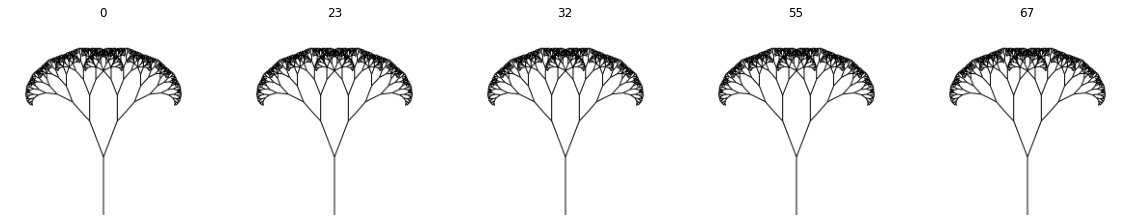

In [22]:
def drawBranch(d: Drawing, pen: aggdraw.Pen, start, direction, mass):
  #figure out endpoint
  end = start + direction * mass * 0.005

  #draw the line
  d.line(start, end, pen=pen)

  #divide mass into two
  mass = mass/1.5

  # From https://www.atqed.com/numpy-rotate-vector
  theta = np.deg2rad(21)
  rot = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])

  direction1 = np.dot(direction, rot)

  # From https://www.atqed.com/numpy-rotate-vector
  theta = np.deg2rad(-21)
  rot = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])

  direction2 = np.dot(direction, rot)

  #if mass is above threshold
  if mass > 1:
    drawBranch(d, pen, end, direction1, mass)
    drawBranch(d, pen, end, direction2, mass)
  #recurse


def gen(seed):
  image = Image.new("RGB", (200, 200), "white")
  pen = aggdraw.Pen("black")
  with Drawing(image) as d:
    drawBranch(d, pen, np.array([0.5, 1]), np.array([0, -1]), 60)
  return image

seeds = [0, 23, 32, 55, 67]
showImages([gen(i) for i in seeds], seeds)

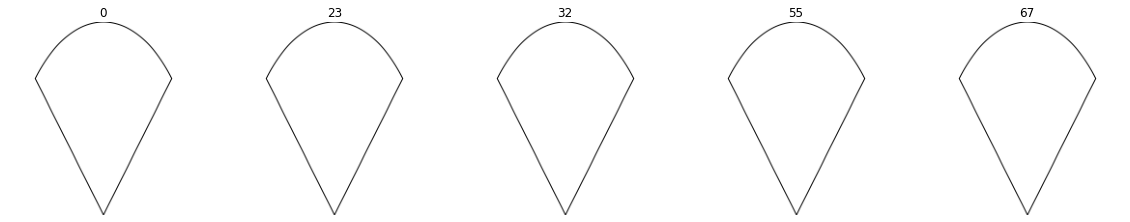

In [ ]:
def gen(seed):
  image = Image.new("RGB", (200, 200), "white")
  pen = aggdraw.Pen("black")
  with Drawing(image) as d:
    d.pieslice([[0, 0], [1, 2]], 45, 135, pen)
    # drawBranch(d, pen, chord , 64)
  return image

seeds = [0, 23, 32, 55, 67]
showImages([gen(i) for i in seeds], seeds)